# 07. Population

## 1. 배경
- 목표 :
  - 인구 소멸 위기 지역 파악
  - 인구 소멸지역 지도 표현
  - 지도 표현에 대한 카르토그램 표현

## 2. 데이터 읽기 + 인구 소멸 지역 계산

### 1) 필요 모듈 임포트

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import set_matplotlib
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### 2) 데이터 읽기
- 엑셀 데이터의 header가 1로 설정
- NaN 값이 있는 행 제거 (이전 값으로 채움) - fillna(method="pad")
  - fillna 옵션
    - `method="pad"`: 이전 값으로 채움
    - `method="bfill"`: 다음 값으로 채움
    - `method="ffill"`: 앞 값으로 채움

In [10]:
population = pd.read_excel("../../data/07.population/07_population_raw_data.xlsx", header = 1)
population.fillna(method="pad",inplace=True)
population.head()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


In [11]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   행정구역(동읍면)별(1)  846 non-null    object 
 1   행정구역(동읍면)별(2)  846 non-null    object 
 2   항목             846 non-null    object 
 3   계              846 non-null    float64
 4   20 - 24세       846 non-null    float64
 5   25 - 29세       846 non-null    float64
 6   30 - 34세       846 non-null    int64  
 7   35 - 39세       846 non-null    float64
 8   65 - 69세       846 non-null    float64
 9   70 - 74세       846 non-null    float64
 10  75 - 79세       846 non-null    int64  
 11  80 - 84세       846 non-null    float64
 12  85 - 89세       846 non-null    float64
 13  90 - 94세       846 non-null    float64
 14  95 - 99세       846 non-null    int64  
 15  100+           846 non-null    float64
dtypes: float64(10), int64(3), object(3)
memory usage: 105.9+ KB


### 3) 컬럼 이름 변경 + 데이터 정리

In [18]:
### 컬럼 이름 변경
population.rename(
    columns={
        "행정구역(동읍면)별(1)" : "광역시도",
        "행정구역(동읍면)별(2)" : "시도",
        "계" : "인구수",
        "항목" : "구분"
    },inplace=True
)

### 구분 컬럼 값을 간결하게 변경
population.loc[population["구분"] == "총인구수 (명)", "구분"]  = "합계"
population.loc[population["구분"] == "남자인구수 (명)", "구분"]  = "남자"
population.loc[population["구분"] == "여자인구수 (명)", "구분"]  = "여자"

### 소계 데이터 제외
population=population[population["시도"] != "소계"]

### 카피 워닝 제거
population.is_copy=False

population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


### 4) 인구 소멸 지역 계산

In [19]:
### 소멸지역 조사를 위한 데이터

### 젊은층 - 20-39세 인구수 컬럼 생성
population["20-39세"] = (
    population["20 - 24세"]+population["25 - 29세"]+population["30 - 34세"]+population["35 - 39세"]
)

### 노년층 - 65세 이상 인구수 컬럼 생성
population["65세이상"] = (
    population["65 - 69세"]+population["70 - 74세"]+population["75 - 79세"]+population["80 - 84세"]+population["85 - 89세"] +population["90 - 94세"] + +population["95 - 99세"] +population["100+"]
)

population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0


In [20]:
### pivot 테이블 생성

pop = pd.pivot_table(
    data=population,
    index=["광역시도", "시도"],
    columns=["구분"],
    values=["인구수", "20-39세", "65세이상"]
)

pop

20-39세                        65세이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시    9956.0    8752.0   18708.0   5139.0   7613.0  12752.0   40288.0   
...            ...       ...       ...      ...      ...      ...       ...   
충청북도 진천군    9391.0    7622.0   17013.0   4731.0   6575.0  11306.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8417.0  11914.0  20331.0   97006.0   
     청주시  128318.0  115719.0  244037.0  37882.0  53671.0  91553.0  419323.0   
     충주시   26600.0   22757.0   49357.0  14407.0  20383.0  34790.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9788.0  13671.0  23459.0  127647.0   

                              
구분              여자        합계  
광역시도 시도                       
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0  
...            ...       ...  
충청북도 진천군   33563.0   69950.0  
     청원구   93807.0  190813.0  
     청주시  415874.0  835197.0  
     충주시  103473.0  208350.0  
     흥덕구  125916.0  253563.0  

[264 rows x 9 columns]

### 5) 소멸 비율 계산

In [22]:
pop["소멸비율"] = pop["20-39세", "여자"] / (pop["65세이상", "합계"]/2)
pop

20-39세                        65세이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시    9956.0    8752.0   18708.0   5139.0   7613.0  12752.0   40288.0   
...            ...       ...       ...      ...      ...      ...       ...   
충청북도 진천군    9391.0    7622.0   17013.0   4731.0   6575.0  11306.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8417.0  11914.0  20331.0   97006.0   
     청주시  128318.0  115719.0  244037.0  37882.0  53671.0  91553.0  419323.0   
     충주시   26600.0   22757.0   49357.0  14407.0  20383.0  34790.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9788.0  13671.0  23459.0  127647.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
강원도  강릉시  107615.0  213846.0  1.226041  
     고성군   14215.0   30114.0  0.707314  
     동해시   46131.0   93297.0  1.289738  
     삼척시   34346.0   69599.0  0.973990  
     속초시   41505.0   81793.0  1.372647  
...            ...       ...       ...  
충청북도 진천군   33563.0   69950.0  1.348311  
     청원구   93807.0  190813.0  2.735232  
     청주시  415874.0  835197.0  2.527913  
     충주시  103473.0  208350.0  1.308249  
     흥덕구  125916.0  253563.0  3.211987  

[264 rows x 10 columns]

### 6) 소멸 비율 기준으로 지역 분류

In [23]:
pop["소멸위기지역"] = pop["소멸비율"] < 1.0
pop

20-39세                        65세이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시    9956.0    8752.0   18708.0   5139.0   7613.0  12752.0   40288.0   
...            ...       ...       ...      ...      ...      ...       ...   
충청북도 진천군    9391.0    7622.0   17013.0   4731.0   6575.0  11306.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8417.0  11914.0  20331.0   97006.0   
     청주시  128318.0  115719.0  244037.0  37882.0  53671.0  91553.0  419323.0   
     충주시   26600.0   22757.0   49357.0  14407.0  20383.0  34790.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9788.0  13671.0  23459.0  127647.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.226041  False  
     고성군   14215.0   30114.0  0.707314   True  
     동해시   46131.0   93297.0  1.289738  False  
     삼척시   34346.0   69599.0  0.973990   True  
     속초시   41505.0   81793.0  1.372647  False  
...            ...       ...       ...    ...  
충청북도 진천군   33563.0   69950.0  1.348311  False  
     청원구   93807.0  190813.0  2.735232  False  
     청주시  415874.0  835197.0  2.527913  False  
     충주시  103473.0  208350.0  1.308249  False  
     흥덕구  125916.0  253563.0  3.211987  False  

[264 rows x 11 columns]

## 3. 지역 ID 생성

### 1) 소멸 위기 지역 조회
- 시도를 기준으로 데이터 조회

In [26]:
pop[pop["소멸위기지역"] == True].index.get_level_values(1)

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [27]:
pop.reset_index(inplace=True)
pop.head()

광역시도   시도   20-39세                      65세이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
3   강원도  삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
4   강원도  속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  1.226041  False  
1    14215.0   30114.0  0.707314   True  
2    46131.0   93297.0  1.289738  False  
3    34346.0   69599.0  0.973990   True  
4    41505.0   81793.0  1.372647  False

### 2) 광역 시도 + 시도

In [33]:
### 값+컬럼 으로 만들기
tmp_col = [
    pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n]
for n in range(0,len(pop.columns.get_level_values(0)))
]


pop.columns=tmp_col
pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


### 3) 지역 ID 생성

In [35]:
pop["시도"].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

In [36]:
### 아이디용 변수 생성
si_name = [None] * len(pop)
si_name

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [37]:
### 구이름 생성
tmp_gu_dic = {
    "수원" : ["장안구", "권선구", "팔달구", "영통구"],
    "성남" : ["수정구", "중원구", "분당구"],
    "안양" : ["만안구", "동안구"],
    "안산" : ["상록구", "단원구"],
    "고양" : ["덕양구", "일산동구", "일산서구"],
    "용인" : ["처인구", "기흥구", "수지구"],
    "청주" : ["상당구", "서원구", "흥덕구", "청원구"],
    "천안" : ["동남구", "서북구"],
    "전주" : ["완산구", "덕진구"],
    "포항" : ["남구", "북구"],
    "창원" : ["의창구", "성산구", "마산합포구", "마산회원구", "진해구"],
    "부천" : ["오정구", "원미구", "소사구"]
}

### 4) 서울중구 , 부천소사 같은 식으로 생성

In [38]:
for idx, row in pop.iterrows():
    ### 서울특별시 > 서울중구
    if row["광역시도"][-3:] not in ["광역시","특별시", "자치시"]:
        si_name[idx] = row["시도"][:-1]
    elif row["광역시도"]=="세종특별자치시":
        si_name[idx]= "세종"
    else :
        ### 서구> 인천 서구
        if len(row["시도"])==2:
            si_name[idx]=row["광역시도"][:2] + " " + row["시도"]
        ### 경기 수원 장안구 > 경기 수원 장안
        else:
            si_name[idx]=row["광역시도"][:2] + " " + row["시도"][:-1]

In [39]:
si_name

['강릉',
 '고성',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '권선',
 '기흥',
 '김포',
 '남양주',
 '단원',
 '덕양',
 '동두천',
 '동안',
 '만안',
 '부천',
 '분당',
 '상록',
 '성남',
 '소사',
 '수원',
 '수정',
 '수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '영통',
 '오산',
 '오정',
 '용인',
 '원미',
 '의왕',
 '의정부',
 '이천',
 '일산동',
 '일산서',
 '장안',
 '중원',
 '처인',
 '파주',
 '팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성',
 '김해',
 '남해',
 '마산합포',
 '마산회원',
 '밀양',
 '사천',
 '산청',
 '성산',
 '양산',
 '의령',
 '의창',
 '진주',
 '진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '남',
 '문경',
 '봉화',
 '북',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구',
 '대구 북구',
 '대구 서구',
 '대구 수성',
 '대구 중구',
 '대전 대덕',
 '대전 동구',
 '대전 서구',
 '대전 유성',
 '대전

### 5) 행정구

In [40]:
for idx, row in pop.iterrows():
   if row["광역시도"][-3:] not in ["광역시","특별시", "자치시"]:
       for keys, values in tmp_gu_dic.items():
           ### 시도 값이 리스트에 있음
           if row["시도"] in values :
               ### 2글자 짜리 행정구일 때  : 부천 소사
               if len(row["시도"])==2:
                   si_name[idx]=keys + " " + row["시도"]
                ### 마산회원구 > 회원
               elif row["시도"] in ["마산합포구", "마산회원구"]:
                   si_name[idx] = keys + " " + row["시도"][2:-1]
                ### 일산동구 > 일산동
               else:
                   si_name[idx] = keys + " " + row["시도"][:-1]

In [41]:
si_name

['강릉',
 '고성',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구',
 '대구 

In [45]:
### 고성군
for idx, row in pop.iterrows():
   if row["광역시도"][-3:] not in ["광역시","특별시", "자치시"]:
       if row["시도"][:-1] == "고성" and row["광역시도"] == "강원도":
              si_name[idx] = "고성(강원)"
       elif row["시도"][:-1] == "고성" and row["광역시도"] == "경상남도":
              si_name[idx] = "고성(경남)"

In [46]:
si_name

['강릉',
 '고성(강원)',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구

In [47]:
### 지도 ID 생성
pop["ID"] = si_name
pop

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,충청북도,진천군,9391.0,7622.0,17013.0,4731.0,6575.0,11306.0,36387.0,33563.0,69950.0,1.348311,False,진천
260,충청북도,청원구,32216.0,27805.0,60021.0,8417.0,11914.0,20331.0,97006.0,93807.0,190813.0,2.735232,False,청주 청원
261,충청북도,청주시,128318.0,115719.0,244037.0,37882.0,53671.0,91553.0,419323.0,415874.0,835197.0,2.527913,False,청주
262,충청북도,충주시,26600.0,22757.0,49357.0,14407.0,20383.0,34790.0,104877.0,103473.0,208350.0,1.308249,False,충주


In [ ]:
### 필요한 데이터만 남김
del pop["20-39세남자"]
del pop["65세이상남자"]
del pop["65세이상여자"]

pop.head()

## 4. 지도 - 카르토그램 만들기

### 1) 지도 데이터 읽기

In [54]:
### 대한민국 지도 엑셀 그림
draw_korea_raw=pd.read_excel("../../data/07.population/07_draw_korea_raw.xlsx")
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [63]:
### 몇번 인덱스에 어떤 데이터가 있는지 출력
### 데이터 프레임으로 저장
draw_korea_raw_stacked=pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(
    columns={
        "level_0": "y",
        "level_1": "x",
        0: "ID"
    },inplace=True
)

draw_korea = draw_korea_raw_stacked
draw_korea

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


### 2) 지도 라인 그리기

In [64]:
### 경계선 데이터
BORDER_LINES = [
    [(5, 1), (5, 2), (7, 2), (7, 3), (11, 3), (11, 0)], # 인천
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], # 서울
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4), (11, 3)], # 경기도
    [(8, 10), (8, 11), (6, 11), (6, 12)], # 강원도
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 4), (16, 4), (16, 2)], # 충청북도
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3), (19, 1)], # 전라북도
    [(13, 5), (13, 6), (16, 6)],
    [(13, 5), (14, 5)], # 대전시 # 세종시
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4), (24, 2), (21, 2)], # 광주
    [(20, 5), (21, 5), (21, 6), (23, 6)], # 전라남도
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)], # 충청북도
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)], # 경상북도
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)], # 대구
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)], # 부산
    [(16, 11), (16, 13)],
    [(27, 5), (27, 6), (25, 6)]
]

In [118]:
def plot_text_simple(draw_korea):
    for idx, row in draw_korea.iterrows():
        ### 띄어쓰기 기준이 ID가 2글자인 경우
        if len(row["ID"].split())==2:
            dispname ="{}\n{}".format(row["ID"].split()[0], row["ID"].split()[1])
        elif row["ID"][:2]=="고성":
            dispname="고성"
        else:
            dispname=row["ID"]

        ### 글씨 크기 조절
        if len(dispname.splitlines()[-1]) >=3:
            fontsize,linespacing = 9.5,1.5
        else:
            fontsize,linespacing = 11,1.2
        ### 주석기능을 이용해 글씨를 출력
        plt.annotate(
            dispname,
            (row["x"]+0.5, row["y"]+0.5),
            weight="bold",
            fontsize=fontsize,
            linespacing=linespacing,
            ha="center", ### 수평 정렬
            va="center", ### 수직 정렬

        )


In [119]:
def simpleDraw(draw_korea):
    plt.figure(figsize=(8,11))
    plot_text_simple(draw_korea)

    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c="black", lw=1.5)
    plt.gca().invert_yaxis()
    plt.axis("off")
    plt.tight_layout()
    plt.show()

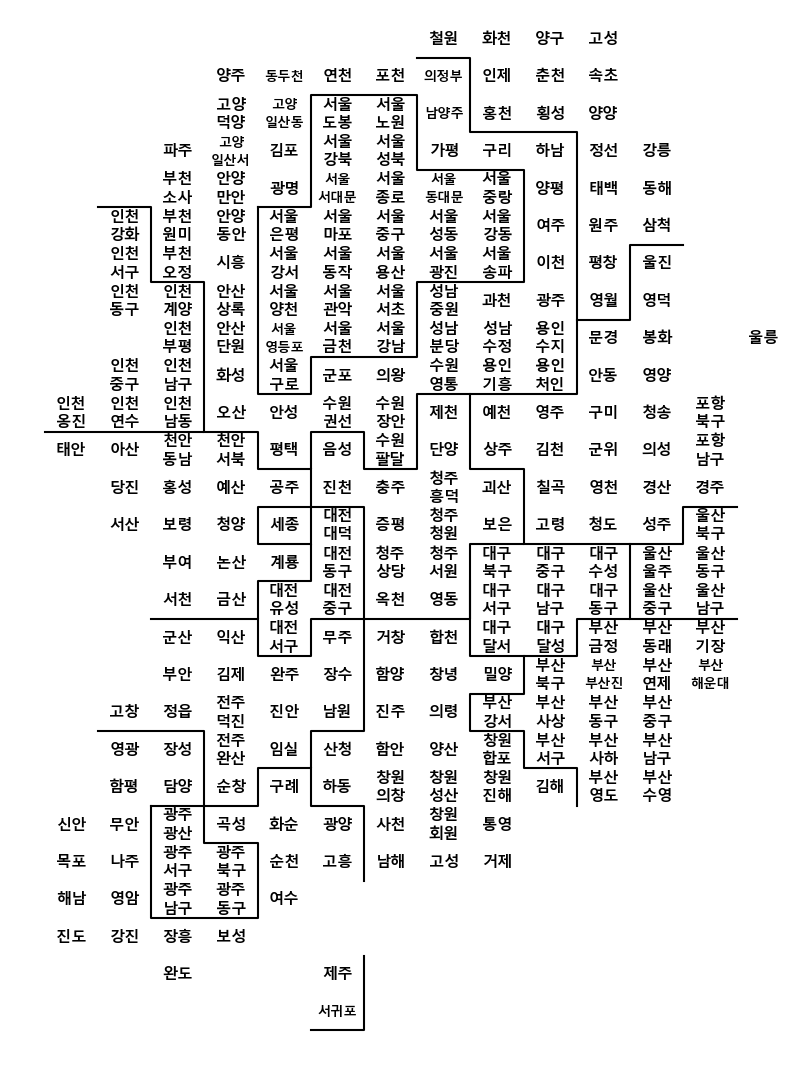

In [120]:
simpleDraw(draw_korea)

### 3) 데이터 검증 작업

In [122]:
### 차집합 구하기
### 광역시가 아님에도 자치구를 가지고 있는 경우
set(pop["ID"].unique())-set(draw_korea["ID"].unique())

{'고양', '부천', '성남', '수원', '안산', '안양', '용인', '전주', '창원', '천안', '청주', '포항'}

In [123]:
tmp_list=set(pop["ID"].unique())-set(draw_korea["ID"].unique())

### 광역시가 아님에도 자치구를 가지고 있는 경우 제거
for tmp in tmp_list:
    pop = pop.drop(pop[pop["ID"]==tmp].index)
print(set(pop["ID"].unique())-set(draw_korea["ID"].unique()))

set()


### 4) 데이터 병합

In [125]:
pop = pd.merge(pop,draw_korea, how="left", on="ID")
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


### 5) 인구 소멸 지역 표시

#### 그림을 그리는 데이터 계산
- 색상을 만들 때, 최소값 흰색
- blockMap : 인구현황
- targetData : 그리고 싶은 컬럼

In [130]:
### 색깔로 의미를 만듦
def get_data_info(targetData, blockMap):
    whitelablemin = (
        max(blockMap[targetData]) - min(blockMap[targetData])
    ) * 0.25 + min(blockMap[targetData])
    vmin = min(blockMap[targetData])
    vmax = max(blockMap[targetData])

    mapdata = blockMap.pivot_table(index="y", columns="x", values=targetData)

    return mapdata,vmax,vmin,whitelablemin

In [131]:
def get_data_info_zero_center(targetData, blockMap):
    whitelablemin=5
    tmp_max=max(
        [np.abs(min(blockMap[targetData])),np.abs(max(blockMap[targetData]))]
    )
    vmin,vmax = -tmp_max,tmp_max
    mapdata = blockMap.pivot_table(index="y", columns="x", values=targetData)

    return mapdata,vmax,vmin,whitelablemin

In [137]:
def plot_text_simple(targetData,blockMap,whitelablemin):
    for idx, row in blockMap.iterrows():
        ### 띄어쓰기 기준이 ID가 2글자인 경우
        if len(row["ID"].split())==2:
            dispname ="{}\n{}".format(row["ID"].split()[0], row["ID"].split()[1])
        elif row["ID"][:2]=="고성":
            dispname="고성"
        else:
            dispname=row["ID"]

        ### 글씨 크기 조절
        if len(dispname.splitlines()[-1]) >=3:
            fontsize,linespacing = 9.5,1.5
        else:
            fontsize,linespacing = 11,1.2
        ### 색상 지정
        annocolor = "white" if np.abs(row[targetData] > whitelablemin) else "white"
        ### 주석기능을 이용해 글씨를 출력
        plt.annotate(
            dispname,
            (row["x"]+0.5, row["y"]+0.5),
            weight="bold",
            fontsize=fontsize,
            linespacing=linespacing,
            ha="center", ### 수평 정렬
            va="center", ### 수직 정렬
            color= annocolor

        )


In [140]:
def drawDraw(targetData, blockMap, cmapname, zero_center=False):
    if zero_center:
        masked_mapdata, vmax, vmin, whitelablemin = get_data_info_zero_center(targetData, blockMap)
    if not zero_center:
        masked_mapdata, vmax, vmin, whitelablemin = get_data_info(targetData, blockMap)

    plt.figure(figsize=(8,11))
    plt.pcolor(masked_mapdata,vmin=vmin, vmax=vmax, cmap=cmapname, edgecolors="#aaaaaa", linewidths=0.5)
    plot_text_simple(targetData, blockMap, whitelablemin)

    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c="black", lw=1.5)
    plt.gca().invert_yaxis()
    plt.axis("off")
    plt.tight_layout()
    cb=plt.colorbar(shrink=0.1,aspect=10)
    cb.set_label(targetData)
    plt.show()

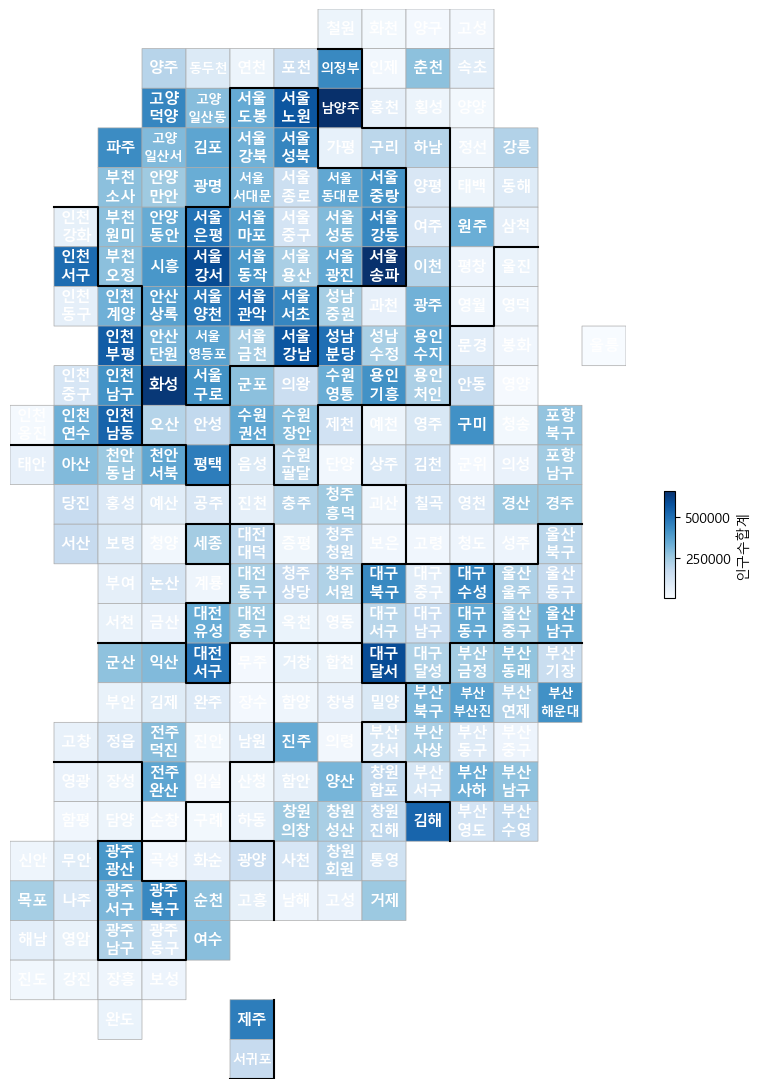

In [141]:
drawDraw("인구수합계", pop, "Blues")

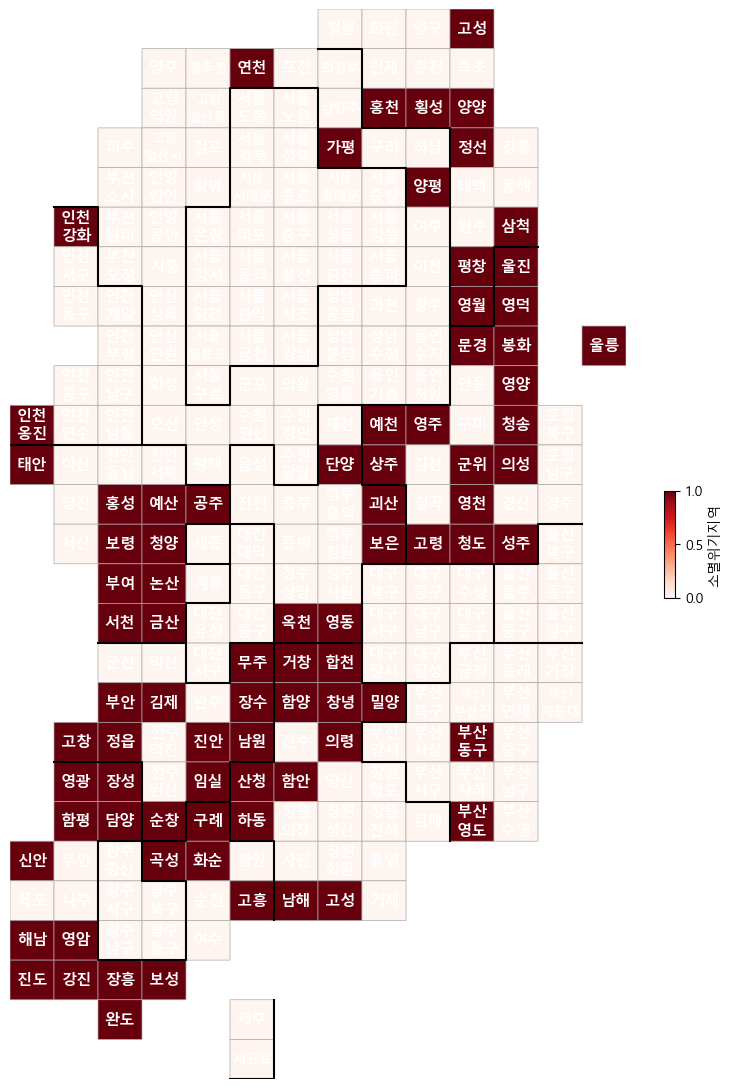

In [142]:
pop["소멸위기지역"] = [1 if con else 0 for con in pop["소멸위기지역"]]
drawDraw("소멸위기지역", pop, "Reds")

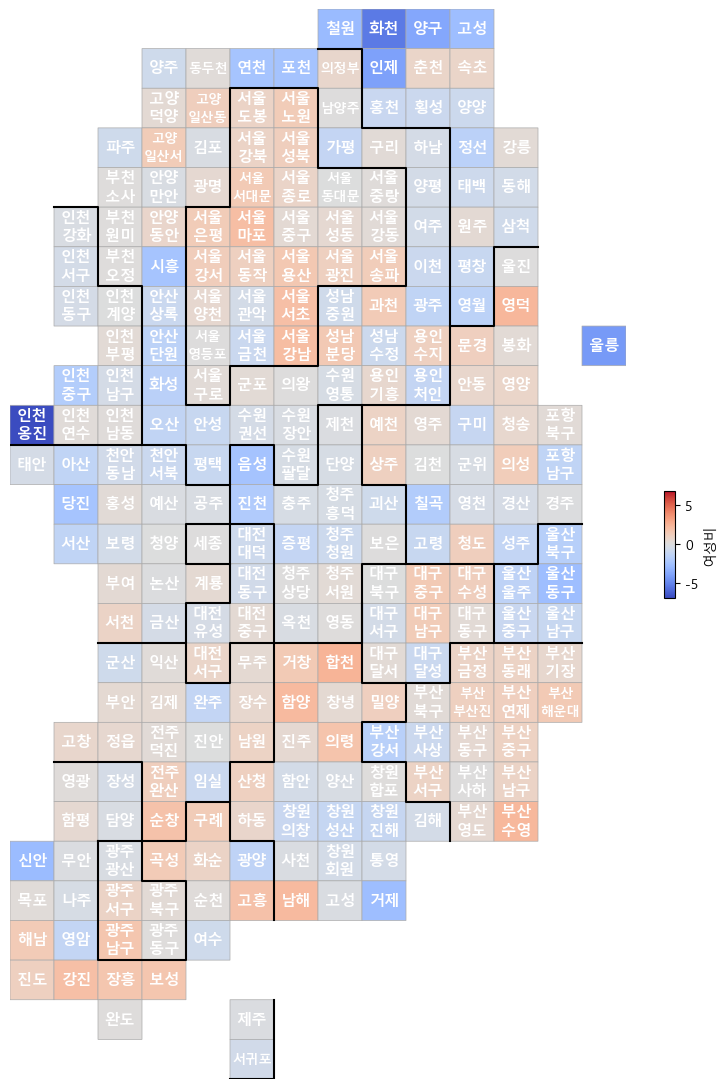

In [145]:
pop["여성비"] = (pop["인구수여자"]/pop["인구수합계"]-0.5)*100
drawDraw("여성비", pop, "coolwarm", zero_center=True)

## 5. folium을 이용한 지도 표현

In [151]:
import folium
import json

pop_folium = pop.set_index("ID")
geo_path = "../../data/07.population/07_skorea_municipalities_geo_simple.json"
get_str = json.load(open(geo_path,encoding="utf-8"))

In [154]:
mymap = folium.Map(location=[36.2002, 127.054], zoom_start=7)
mymap.choropleth(
    geo_data=get_str,
    data=pop_folium["인구수합계"],
    key_on="feature.id",
    columns=[pop_folium.index, pop_folium["인구수합계"]],
    fill_color="YlGnBu",
)

In [155]:
mymap

In [157]:
### 소멸 위기 시역 시각화
mymap.choropleth(
    geo_data=get_str,
    data=pop_folium["소멸위기지역"],
    key_on="feature.id",
    columns=[pop_folium.index, pop_folium["소멸위기지역"]],
    fill_color="PuRd",
)

mymap

In [159]:
### 데이터 저장
draw_korea.to_csv("../../data/07.population/07_draw_korea.csv",encoding="utf-8",sep=",")